# 1. 인공지능과 가위바위보 하기

## 1-1. 인공지능과 가위바위보 하기
### 간단한 이미지 분류기
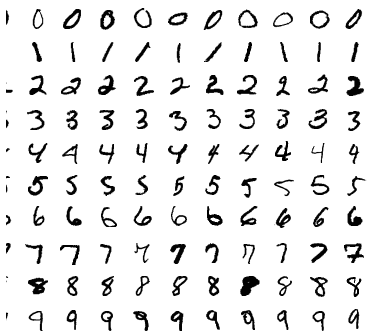
- 숫자 손글시 인식
    - 0 ~ 9까지 총 10개의 클래스(class)
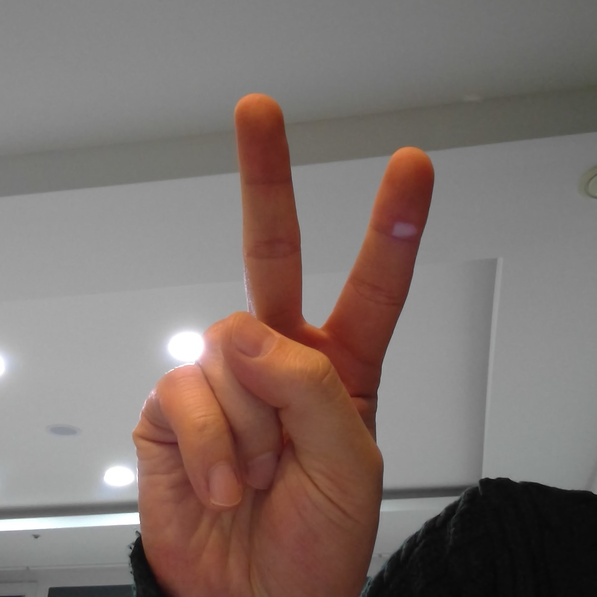
- 가위바위보 게임
    - 가위, 바위, 보 총 3개의 클래스
    
### 숫자 손글씨 인식기 만들기(Sequential Model을 이용하는 방법)
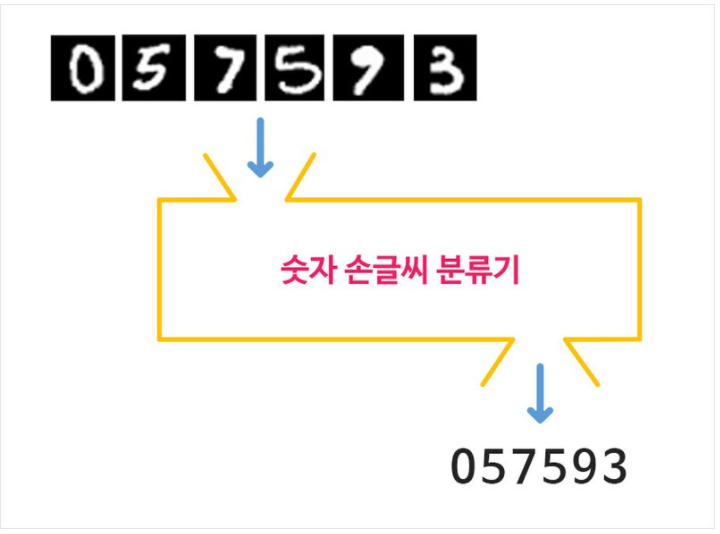

### 어떻게 만들지?
- 일반적으로 딥러닝 기술은 **"데이터 준비 -> 딥러닝 네트워크 설계 -> 학습 -> 테스트(평가)"** 의 순서대로 만들게 됨
- 숫자 손글시 분류기는 손으로 쓴 숫자 이미지를 입력으로 받으면, 그 이미지가 어떤 숫자 나타내는지 출력해 낼 수 있음. 
- 숫자 0에 해당하는 이미지가 입력을 들어오면 숫자 0을 출력으로, 숫자 5에 해당하는 이미지가 입력으로 들어오면 숫자 5를 출력으로 내보내는 형태

## 1-2. 데이터를 준비하자!
### MNIST 숫자 손글씨 Dataset 불러들이기
- 텐서플로우(TensorFlow)의 표준 API인 ==tf.keras==의 Sequential API 이용
- 텐서플로우? 구글(Google)에서 오픈소스로 제공하는 머신러닝 라이브러리 중 하나
- 구현실습은 Tensorflow 버전 2.4.1에서 진행될 예정
- MNIST 숫자 손글씨 이미지의 크기는 28 * 28
- 총 70000장 중, 60000장은 training set, 10000장은 test set으로 구성
- 약 500명 사용자가 작성한 숫자 이미지
- 학습용 데이터(training set)은 대략 250명의 손글씨 들어가 있음
- 다른 250여명의 데이터가 시험용 데이터로 이용됨
- [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

In [34]:
# 모듈, 패키지 import
import tensorflow as tf
from tensorflow import keras

# numpy, matplotlib import
import numpy as np
import matplotlib.pyplot as plt

# tensorflow 버전 출력
print(tf.__version__)

2.4.1


In [35]:
# MNIST 데이터셋은 Yann Lecun 교수님이 공개한 데이터
# MNIST 데이터 불러오기
mnist = keras.datasets.mnist

In [36]:
# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [37]:
# x_train 배열의 크기를 출력
print(len(x_train))

60000


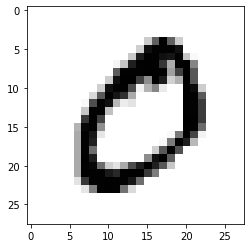

In [38]:
# 숫자 손글씨 이미지 1개 출력
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

In [39]:
print(y_train[1])

0


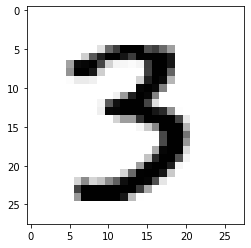

10001 번째 이미지의 숫자는 바로 3 입니다.


In [40]:
# index에서 0에서 59999 사이 숫자를 지정
index = 10000
plt.imshow(x_train[index], cmap = plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로', y_train[index], '입니다.')

### 참고: Matplotlib이란?
- 파이썬에서 제공하는 시각화(Visualization) 패키지
- 차트(chart), 플롯(plot)등 다양한 형태로 데이터 시각화할 수 있는 강력한 기능 제공
- [Matplotlib 활용사례 보기](https://matplotlib.org/2.0.2/gallery.html)

### 학습용 데이터와 시험용 데이터
```python
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```
- mnist.load()함수 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어서 받아들이고 있음
- (x_train, y_train)만을 가지고 학습시키고, 학습이 끝난 후에는 이 손글씨 분류기가 얼마나 좋은 성능 보이는지를 시험용 데이터 (x_test, y_test)로 테스트
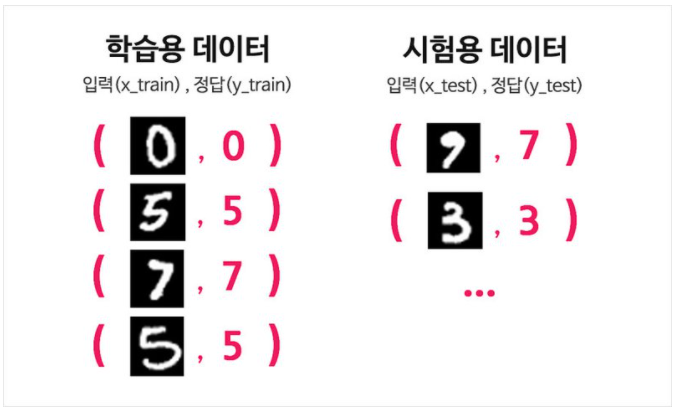
- [데이터셋 이야기](https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/)
    - 풀고자 하는 문제 및 만들고자 하는 모델에 따라 데이터셋 달라짐
    - 훈련셋을 몇 번 반복해서 학습할 것인가를 정하는 것이 에포크(epochs)
    - 학습이 덜 된 상태? 언터피팅(Underfitting)
    - 시점을 적정 반복 횟수로 보고 학습을 중단 -> 조기종료(early stopping)

In [41]:
# 학습용 데이터 shape 조회
# 28 * 28 크기의 숫자 이미지가 60,000장 있다는 뜻
print(x_train.shape)

(60000, 28, 28)


In [42]:
# 시험용 데이터 개수 조회
# 10,000장의 시험용 데이터가 저장되어 있음
print(x_test.shape)

(10000, 28, 28)


In [43]:
# 숫자 손글시 이미지의 실제 픽셀 값은 0 ~ 255 사이
print('최소값:', np.min(x_train), '최대값:', np.max(x_train))

최소값: 0 최대값: 255


In [44]:
# 인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0 ~ 1 사이 값으로 정규화시켜주는 것이 좋음
# MNIST 데이터는 각 픽셀의 값이 0 ~ 255 사이 범위에 있으므로 데이터들을 255.0으로 나누어주기
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:', np.min(x_train_norm), '최대값:', np.max(x_train_norm))

최소값: 0.0 최대값: 1.0


## 1-3. 딥러닝 네트워크 설계하기
### Sequential Model을 사용해 보자
- 텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법 사용
- keras에서 모델을 만드는 방법은 Sequential API, Functional API, 밑바닥부터 직접 코딩하는 방법 등이 있음
- Sequential API
    - 개발 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델 만들어낼 수 있는 방법
    - 미리 정의된 딥러닝 레이어(layer)를 쉽게 추가할 수 있음

In [45]:
# tf.keras의 Sequential API 이용해 LeNet이라는 딥러닝 네트워크 설계
model = keras.models.Sequential()
# 16 -> 얼마나 다양한 이미지 특징 살펴볼것인지
# input_shape -> 입력이미지의 형태
model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
# 32 -> 분류기 알고리즘을 얼마나 복잡하게 할 것인가(복잡한 문제일수록 이 수 늘려보기)
model.add(keras.layers.Dense(32, activation = 'relu'))
# 10 -> 최종 분류기의 class수. 0 ~ 9까지 총 10개의 클리스
model.add(keras.layers.Dense(10, activation = 'softmax'))

print('Model에 추가된 Layer 개수:', len(model.layers))

Model에 추가된 Layer 개수: 7


### 모델 설명
- Conv2D 레이어의 첫번째 인자? 사용하는 이미지 특징의 수
    - 16과 32 사용. 가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 뜻
    - 숫자 이미지는 사실 매우 단순한 형태의 이미지
    - 만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상일 것. 그럴 경우에는 특징 숫자 늘려주는 것 고려
- Dense 레이어의 첫 번째 인자? 분류기에 사용되는 뉴런의 숫자
    - 이 값이 클수록 보다 복잡한 분류기 만들 수 있음
    - 10개의 숫자가 아닌 알파벳을 구분하고 싶다면 대문자 26개, 소문자 26개로 총 52개의 클래스 분류해 내야 함
    - 그래서 32보다 큰 64, 128 고려해 볼 수 있음
- 마지막 Dense 레이어의 뉴런 숫자? 결과적으로 분류해 내야 하는 클래스 수로 지정
    - 숫자 인식기에는 10, 알파벳 인식기에는 52

In [46]:
# 얼마나 잘 만들었는지 확인하기
# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 1-4. 딥러닝 네크워크 학습시키기
- 네트워크의 입력? (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수)
- 첫 번째 레이어에 input_shape = (28, 28, 1)로 지정
- print(x_train.shape)을 해보면 (60000. 28, 28)로 채널수에 대한 정보가 없음
- 따라서 (60000, 28, 28, 1)로 만들어 줘야 함
- 여기서 채널수 1은 흑백 이미지 의미
- 컬러 이미지라면 R,G,B 3개의 값이 있기 때문에 3

In [47]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

# 데이터갯수에 -1을 쓰면 reshape시 자동계산됨
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape:{}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape:{}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape:(60000, 28, 28, 1)
After Reshape - x_test_reshaped shape:(10000, 28, 28, 1)


In [48]:
# x_train 학습 데이터로 딥러닝 네트워크 학습
# epochs = 10은 전체 60,000개의 데이터를 10번 반복 사용해서 학습 시키라는 뜻
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train_reshaped, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4357 - accuracy: 0.8669
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0688 - accuracy: 0.9787
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0481 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0352 - accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0278 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0153 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.009

## 1-5. 얼마나 잘 만들었는지 확인하기
### 테스트 데이터로 성능 확인해 보자

In [49]:
# 시험용 데이터(x_test)
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0322 - accuracy: 0.9904
test_loss: 0.03223950043320656
test_accuracy: 0.9904000163078308


### 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자
- model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포 출력할 수 있음
- model이란 사실 10개의 숫자 중 어느 것인지에 대한 확률값 출력하는 함수
- 함수 출력값 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자

In [50]:
# model이 추론한 확률값
predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result, axis = 1)

# 1번째 x_test 살펴보기
# model이 추론한 결과가 7일 확률
idx = 0
print('model.predict() 결과: ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과:' , predicted_labels[idx])
print('실제 데이터의 라벨: ', y_test[idx])

model.predict() 결과:  [2.6165564e-10 2.6381940e-11 6.5733596e-09 1.4328915e-09 5.2179361e-10
 1.4422654e-14 1.9337742e-14 9.9999976e-01 7.0748198e-09 1.9842061e-07]
model이 추론한 가장 가능성이 높은 결과: 7
실제 데이터의 라벨:  7


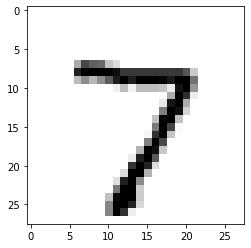

In [51]:
# 정말 숫자 7인지 확인
plt.imshow(x_test[idx], cmap = plt.cm.binary)
plt.show()

예측확률분포: [8.0071159e-06 1.5774090e-04 1.0808317e-06 1.0478599e-04 2.0610075e-01
 5.4977096e-05 4.0598778e-05 4.9644463e-05 2.5279540e-05 7.9345709e-01]
라벨: 4 , 예측결과: 9


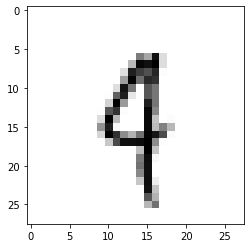

예측확률분포: [5.7322191e-10 2.4989052e-07 3.5013905e-04 5.1255480e-05 1.2661600e-09
 1.1632862e-09 6.2763861e-12 9.9717051e-01 2.4240487e-03 3.8491903e-06]
라벨: 8 , 예측결과: 7


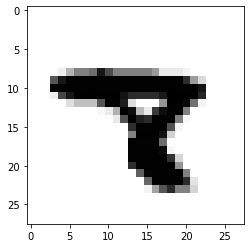

예측확률분포: [8.92556045e-07 4.35159063e-06 6.12040021e-05 3.56485069e-01
 8.68802636e-06 6.28009081e-01 3.09235220e-05 2.59075459e-05
 1.72961433e-03 1.36443395e-02]
라벨: 3 , 예측결과: 5


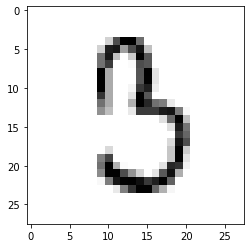

예측확률분포: [4.8636127e-07 8.1742780e-07 1.0695101e-09 2.7088765e-08 2.3784368e-01
 7.3121610e-06 1.7499368e-04 8.0432152e-08 1.2663323e-04 7.6184595e-01]
라벨: 4 , 예측결과: 9


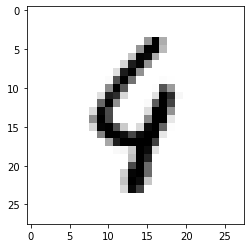

예측확률분포: [2.0391304e-10 2.2918562e-04 7.1003890e-01 2.6959442e-05 4.0884544e-08
 8.5427762e-16 6.2092082e-14 2.8970468e-01 1.3654211e-07 1.9746089e-08]
라벨: 7 , 예측결과: 2


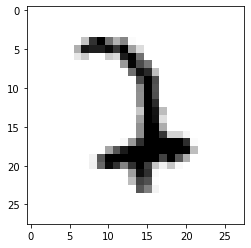

In [52]:
# model이 추론해 낸 숫자와 실제 라벨의 값이 다르 경우
import random
wrong_predict_list = []

for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다르 경우만 모아보기
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
# wrong_predict_list에서 랜덤하게 5개만 뽑기
samples = random.choices(population = wrong_predict_list, k = 5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) +" , 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap = plt.cm.binary)
    plt.show()

## 1-6. 더 좋은 네트워크 만들어 보기
- 3번째 스텝 '딥러닝 네트워크 설계하기'에서 살펴본 하이퍼파라미터 바꾸어보기
- Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여보거나
- Dense 레이어에서 뉴런수 바꾸어 보거나
- 학습 반복 횟수인 epoch 값 변경해보기

In [53]:
# 바꿔볼 수 있는 하이퍼파라미터들
n_channel_1 = 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [55]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [56]:
# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3264 - accuracy: 0.8992
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0497 - accuracy: 0.9844
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0340 - accuracy: 0.9894
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0216 - accuracy: 0.9935
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9937
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0114 - accuracy: 0.9965
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0095 - accuracy: 0.9969
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0085 - accuracy: 0.9974
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0058 - accuracy: 0.9980
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.005

In [57]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose = 2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0458 - accuracy: 0.9917
test_loss: 0.04584410414099693
test_accuracy: 0.9916999936103821


## 1-7. 미니 프로젝트: 가위바위보 분류기를 만들자
### 1. 데이터를 준비하자
 - 구글의 teachable machine 사이트 -> Get Started -> Image Project
[teachable machine](https://teachablemachine.withgoogle.com/)


#### 디렉토리 만들기
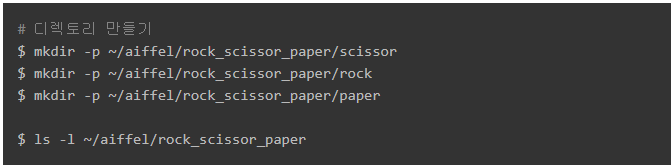

##### 토막 리눅스 사용법
- mkdir -p: mkdir 사용해 하위 디렉토리 생성할 때 차례대로 만들지 않고 중간 디렉토리 없이 바로 그 다음 하위 디렉토리 만들게되면 "디렉토리를 생성할 수 없습니다." 메세지가 나옴
- -p 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리 생성하게 됨

#### 이미지 업로드
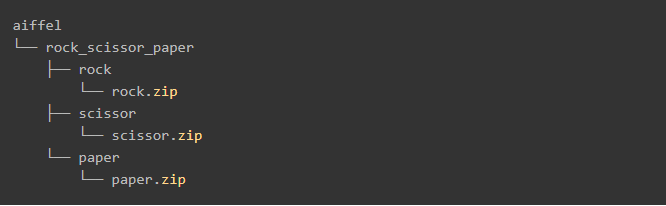

#### 클라우드 이미지 압축 해제
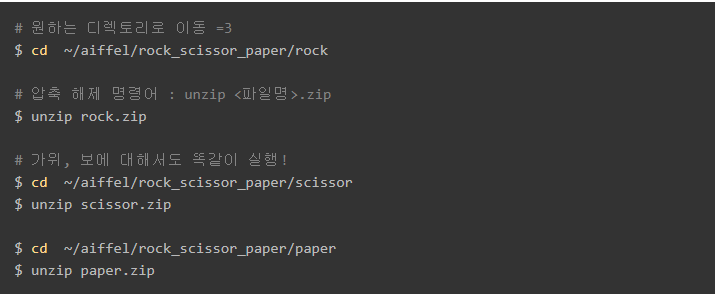

### 2. 데이터 불러오기 + Resize 하기
- 숫자 손글씨의 경우, 이미지 크기가 28x28이었음
- 가위, 바위, 보 이미지도 28x28로 만들어야 함
- PIL 라이브러리 사용

In [58]:
# 필요 라이브러리  import
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [59]:
# 현재 디렉토리 확인
!pwd

/aiffel/aiffel/Exploration


In [61]:
import os
import shutil

base_dir = './data_all_users'
members = ['경은', '수완', '승민', '용협', '은서', '재성', '정식', '준일', '지윤', '진환', '태경', '호성']
# members = os.listdir(base_dir)
categories = ['paper', 'scissor', 'paper']
base_dst = './data'

for member in members:
    for category in categories:
        path = os.path.join(base_dir, member, category)
        for image in os.listdir(path):
            image_rename = member + '_' + image
            image_path_src = os.path.join(base_dir, member, category, image)
            image_path_dst = os.path.join(base_dst, category, image_rename)
            shutil.copyfile(image_path_src, image_path_dst)


print(f"총 {len(members)}명의 데이터가 모였습니다~~")

for category in categories:
    print(f"{category}에 {len(os.listdir('./data/'+category))}개 ")


FileNotFoundError: [Errno 2] No such file or directory: './data_all_users/경은/paper'

In [62]:
# 이미지 사이즈 변경(224 * 224 -> 28 * 28)
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "./data_all_users"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

0  images to be resized.
바위 이미지 resize 완료!


In [63]:
# 이미지 사이즈 변경(224 * 224 -> 28 * 28)
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일 읽어들여서
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    
# 파일마다 모두 28 * 28 사이즈로 바꾸어 저장
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        print(len(images), " images resized.")
        
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  im

In [104]:
# 이미지 사이즈 변경(224 * 224 -> 28 * 28)
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일 읽어들여서
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    
# 파일마다 모두 28 * 28 사이즈로 바꾸어 저장
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        print(len(images), " images resized.")
        
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  im

### 3. Data load하기

In [65]:
# load_data 함수
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# 이미지 정규화
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path, 300)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [66]:
x_train.shape, y_train.shape

((300, 28, 28, 3), (300,))

라벨:  0


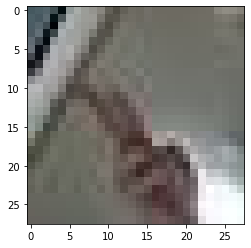

In [67]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 4. 딥러닝 네트워크 설계하기

In [68]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(0)

# 상수 지정
N_CHANNEL_1 = 32
N_CHANNEL_2 = 64
N_DENSE = 64
N_TRAIN_EPOCH = 20

model = keras.models.Sequential()
# 얼마나 다양한 이미지 특징 살펴볼 것인가 - 16개의 이미지 특징
model.add(keras.layers.Conv2D(N_CHANNEL_1, (3,3), activation = 'relu', input_shape = (28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
# # 얼마나 다양한 이미지 특징 살펴볼 것인가 - 32개의 이미지 특징
model.add(keras.layers.Conv2D(N_CHANNEL_2, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

#분류기 알고리즘을 얼마나 복잡하게 할 것인가
model.add(keras.layers.Dense(N_DENSE, activation = 'relu'))

# 출력층 - 최종 분류기의 class 수 - 3(가위, 바위, 보)
model.add(keras.layers.Dense(3, activation = 'softmax'))

# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

### 5.딥러닝 네트워크 학습시키기

In [69]:
# 모델 구조 이미지로 보기 - 패키지 설치
!pip install pydot pydotplus graphviz

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


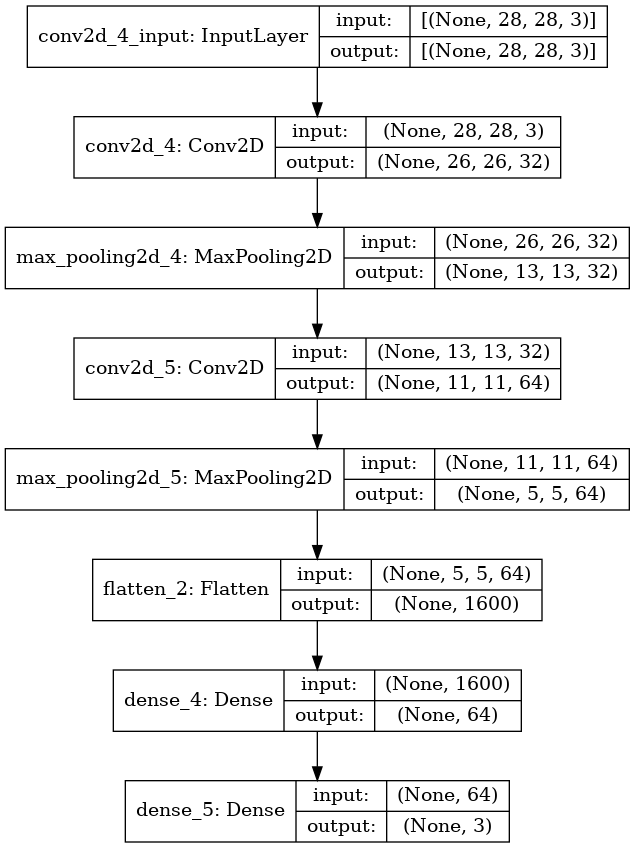

In [70]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'model.png', show_shapes = True)

In [71]:
# 컴파일 단계
# 구축된 모델에 추가 설정(어떻게 학습할지에 대한 설정)
# 손실함수
# Optimizer(최적화 함수)
# 평가지표
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [72]:
# 모델 훈련

model.fit(x_train_norm, y_train, epochs = N_TRAIN_EPOCH)

Epoch 1/20
10/10 [==============================] - 3s 194ms/step - loss: 1.0611 - accuracy: 0.3277
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 0.7727 - accuracy: 0.7819
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.7900
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 0.3649 - accuracy: 0.8523
Epoch 5/20
10/10 [==============================] - 0s 4ms/step - loss: 0.3242 - accuracy: 0.8639
Epoch 6/20
10/10 [==============================] - 0s 4ms/step - loss: 0.1519 - accuracy: 0.9564
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 0.1216 - accuracy: 0.9651
Epoch 8/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.9694
Epoch 9/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.9784
Epoch 10/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9916
Epoch 11/20
10/10

### 6. 모델 성능 테스트

In [93]:
image_dir_path = os.getenv("HOME") + '/aiffel/aiffel/Exploration/rock_scissor_paper_test'
(x_test, y_test) = load_data(image_dir_path, 2)
x_test_norm = x_test/255.0

학습데이터(x_train)의 이미지 개수는 0 입니다.


x_test.shape: (6, 28, 28, 3)
y_test.shape: (6,)

라벨:  0


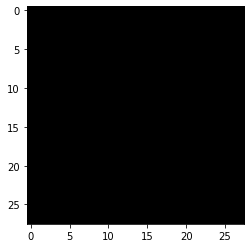

In [83]:
print("x_test.shape: {}".format(x_test.shape))
print("y_test.shape: {}".format(y_test.shape))

plt.imshow(x_test[0])
print('\n라벨: ', y_test[0])

In [106]:
# 앞에서 생성한 load_data 함수로 test data 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 300)  # 가위바위보 이미지 개수 총합에 주의
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

# 데이터 shape 확인
# print("x_test shape: {}".format(x_test.shape))
# print("y_test shape: {}".format(y_test.shape))

# # 데이터 1개 출력해서 확인
# # plt.imshow(x_test[0])
# # print('\n라벨: ', y_test[0]

ValueError: could not broadcast input array from shape (224,224,3) into shape (28,28,3)

In [100]:
# 데이터 1개 출력해서 확인
plt.imshow(x_test[0])
print('\n라벨: ', y_test[0]

SyntaxError: unexpected EOF while parsing (<ipython-input-100-9529a38be69f>, line 3)

In [101]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.1477 - accuracy: 0.0000e+00
test_loss: 1.1476815938949585 
test_accuracy: 0.0


In [109]:

# 앞에서 생성한 load_data 함수로 test data 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/Exploration/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 100)  # 가위바위보 이미지 개수 총합에 주의
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

# 데이터 shape 확인
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

# 데이터 1개 출력해서 확인
plt.imshow(x_test[0])
print('\n라벨: ', y_test[0])

ValueError: could not broadcast input array from shape (224,224,3) into shape (28,28,3)